<a href="https://colab.research.google.com/github/jyesudian/AnoNetworkData/blob/main/cicddos2019/cic_ddos2019_XGB_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: Need help in deriving PCA for a dataset. I need sample code. Also, I would like to use the dataset LuFlow which is available in my Google Drive. I think I need to do data engineering on the dataset. Can you give the step by step example and the code accordingly?
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

import seaborn as sns


In [2]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.utils import plot_model
%load_ext tensorboard

In [ ]:
### To check whether GPU is used.
gpu_available = tf.config.list_physical_devices('GPU')

if gpu_available:
    print("GPU is available and being used.")
    print("GPU Details:", gpu_available)
else:
    print("GPU is not available. Using CPU.")

In [4]:
from IPython.display import Image
import os, datetime

In [5]:
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score,confusion_matrix,classification_report,roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

In [6]:
from google.colab import drive
drive.mount('/content/drive')
# Define the file path to your dataset in Google Drive
#file_path = '/content/drive/MyDrive/LuFlow.csv'
#file_path = '/content/drive/MyDrive/VIT/Dataset/CIC-DDos2019/cic-ddos2019.csv'


Mounted at /content/drive


In [9]:
file_path_1 = '/content/drive/MyDrive/VIT/Dataset/CIC-DDoS2019/cic-ddos2019.csv'
#file_path_2 = '/content/drive/MyDrive/VIT/Dataset/LuFlow2021/2022.06.13.csv'
#file_path_3 = '/content/drive/MyDrive/VIT/Dataset/LuFlow2021/2022.06.14.csv'

In [10]:
# Step 1: Load the dataset from Google Drive
df1 = pd.read_csv(file_path_1)
#df2 = pd.read_csv(file_path_2)
#df3 = pd.read_csv(file_path_3)

column_names = df1.columns
print("Column Names df1 / Features:")
print(column_names)

#column_names = df2.columns
#print("Column Names df2 / Features:")
#print(column_names)

#column_names = df3.columns
#print("Column Names df3 / Features:")
#print(column_names)

Column Names df1 / Features:
Index(['Protocol', 'Total Fwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Std', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Flow Bytes/s', 'Fwd IAT Total',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Max', 'Bwd IAT Min',
       'Fwd PSH Flags', 'Fwd Header Length', 'Bwd Header Length',
       'Fwd Packets/s', 'Bwd Packets/s', 'Packet Length Max',
       'Packet Length Std', 'Packet Length Variance', 'SYN Flag Count',
       'ACK Flag Count', 'URG Flag Count', 'CWE Flag Count', 'Down/Up Ratio',
       'Avg Packet Size', 'Subflow Fwd Bytes', 'Subflow Bwd Bytes',
       'Init Fwd Win Bytes', 'Init Bwd Win Bytes', 'Fwd Act Data Packets',
       'Fwd Seg Size Min', 'Active Std', 'Active Max', 'Active Min',
       'Idle Std', 'Idle Min', 'Label'],
      dtype='object')


In [13]:
def dataProperties(df, day):
    print(day)
    df.shape
    print ('Number of rows (Samples): ' , df.shape[0])
    print ('Number of columns (Features): ' , df.shape[1])
#     print(df)
#     print(df.info())
    print(df['Label'].value_counts())
    print("\n\n\n")

In [14]:
%%time
dataProperties(df1, "DF1")

DF1
Number of rows (Samples):  195662
Number of columns (Features):  38
Label
0    97831
1    97831
Name: count, dtype: int64




CPU times: user 4.55 ms, sys: 19 µs, total: 4.56 ms
Wall time: 8.78 ms


In [ ]:
%%time
dataProperties(df2, "DF2")

In [ ]:
%%time
dataProperties(df3, "DF3")

In [ ]:
### Dont execute if you dont have multiple df
#dataframes_to_combine = [df1, df2, df3]

# Use pd.concat() to combine the DataFrames row-wise
# The default behavior of concat is to combine along rows (axis=0)
df = pd.concat(dataframes_to_combine, ignore_index=True)

#Display the first few rows of the combined DataFrame to verify
print("First 5 rows of the combined DataFrame:")
print(df.head())

#Check the shape of the combined DataFrame
print("\nShape of the combined DataFrame:")
print(df.shape)

**Store these datasets in Google Drive as they can be used as starting point few use cases.**

In [15]:
def dropInfNull(df):
    print (df.shape)

    # replace infinity value as null value
    df = df.replace(["Infinity", "infinity"], np.inf)
    df = df.replace([np.inf, -np.inf], np.nan)

    # drop all null values
    df.dropna(inplace=True)

    print (df.shape)

    return df

**Now Proceed With Entropies as the Entropy calculation is done by the Luflow dataset providers itself.**

In [16]:
%%time
network_data_d1 = dropInfNull(df1)

(195662, 38)
(195662, 38)
CPU times: user 55.9 ms, sys: 47.7 ms, total: 104 ms
Wall time: 103 ms


In [17]:
#Get the unique labels
unique_labels = network_data_d1['Label'].unique()

#Get the counts of each unique label
label_counts = network_data_d1['Label'].value_counts()

#Print the results

print("Unique Labels:")
print(unique_labels)

print("\nCounts of Each Label:")
print(label_counts)

Unique Labels:
[0 1]

Counts of Each Label:
Label
0    97831
1    97831
Name: count, dtype: int64


**Understanding the Data Type of the Dataset**

In [18]:
# Access the dtypes attribute
feature_data_types = network_data_d1.dtypes

# Print the data types
print("Data Types of Features:")
print(feature_data_types)

Data Types of Features:
Protocol                    int64
Total Fwd Packets           int64
Fwd Packet Length Max     float64
Fwd Packet Length Std     float64
Bwd Packet Length Min       int64
Bwd Packet Length Mean    float64
Flow Bytes/s              float64
Fwd IAT Total             float64
Fwd IAT Min               float64
Bwd IAT Total             float64
Bwd IAT Max                 int64
Bwd IAT Min                 int64
Fwd PSH Flags               int64
Fwd Header Length           int64
Bwd Header Length           int64
Fwd Packets/s             float64
Bwd Packets/s             float64
Packet Length Max           int64
Packet Length Std         float64
Packet Length Variance    float64
SYN Flag Count              int64
ACK Flag Count              int64
URG Flag Count              int64
CWE Flag Count              int64
Down/Up Ratio               int64
Avg Packet Size           float64
Subflow Fwd Bytes           int64
Subflow Bwd Bytes           int64
Init Fwd Win Bytes      

**Drop Constant Column**

In [19]:
%%time
# drop the constant columns (which varience is 0)
variances = network_data_d1.var(numeric_only=True)
constant_columns = variances[variances == 0].index
df_balanced = network_data_d1.drop(constant_columns, axis=1)

print(constant_columns)
print (df_balanced.shape)

Index([], dtype='object')
(195662, 38)
CPU times: user 37.4 ms, sys: 18.6 ms, total: 56 ms
Wall time: 60.3 ms


**Drop Duplicate Column**

In [20]:
duplicates = set()
for i in range(0, len(df_balanced.columns)):
    col1 = df_balanced.columns[i]
    for j in range(i+1, len(df_balanced.columns)):
        col2 = df_balanced.columns[j]
        if(df_balanced[col1].equals(df_balanced[col2])):
            duplicates.add(col2)

print (duplicates)
df_balanced.drop(duplicates, axis=1, inplace=True)
print (df_balanced.shape)

set()
(195662, 38)


**Drop Columns based on correlation**

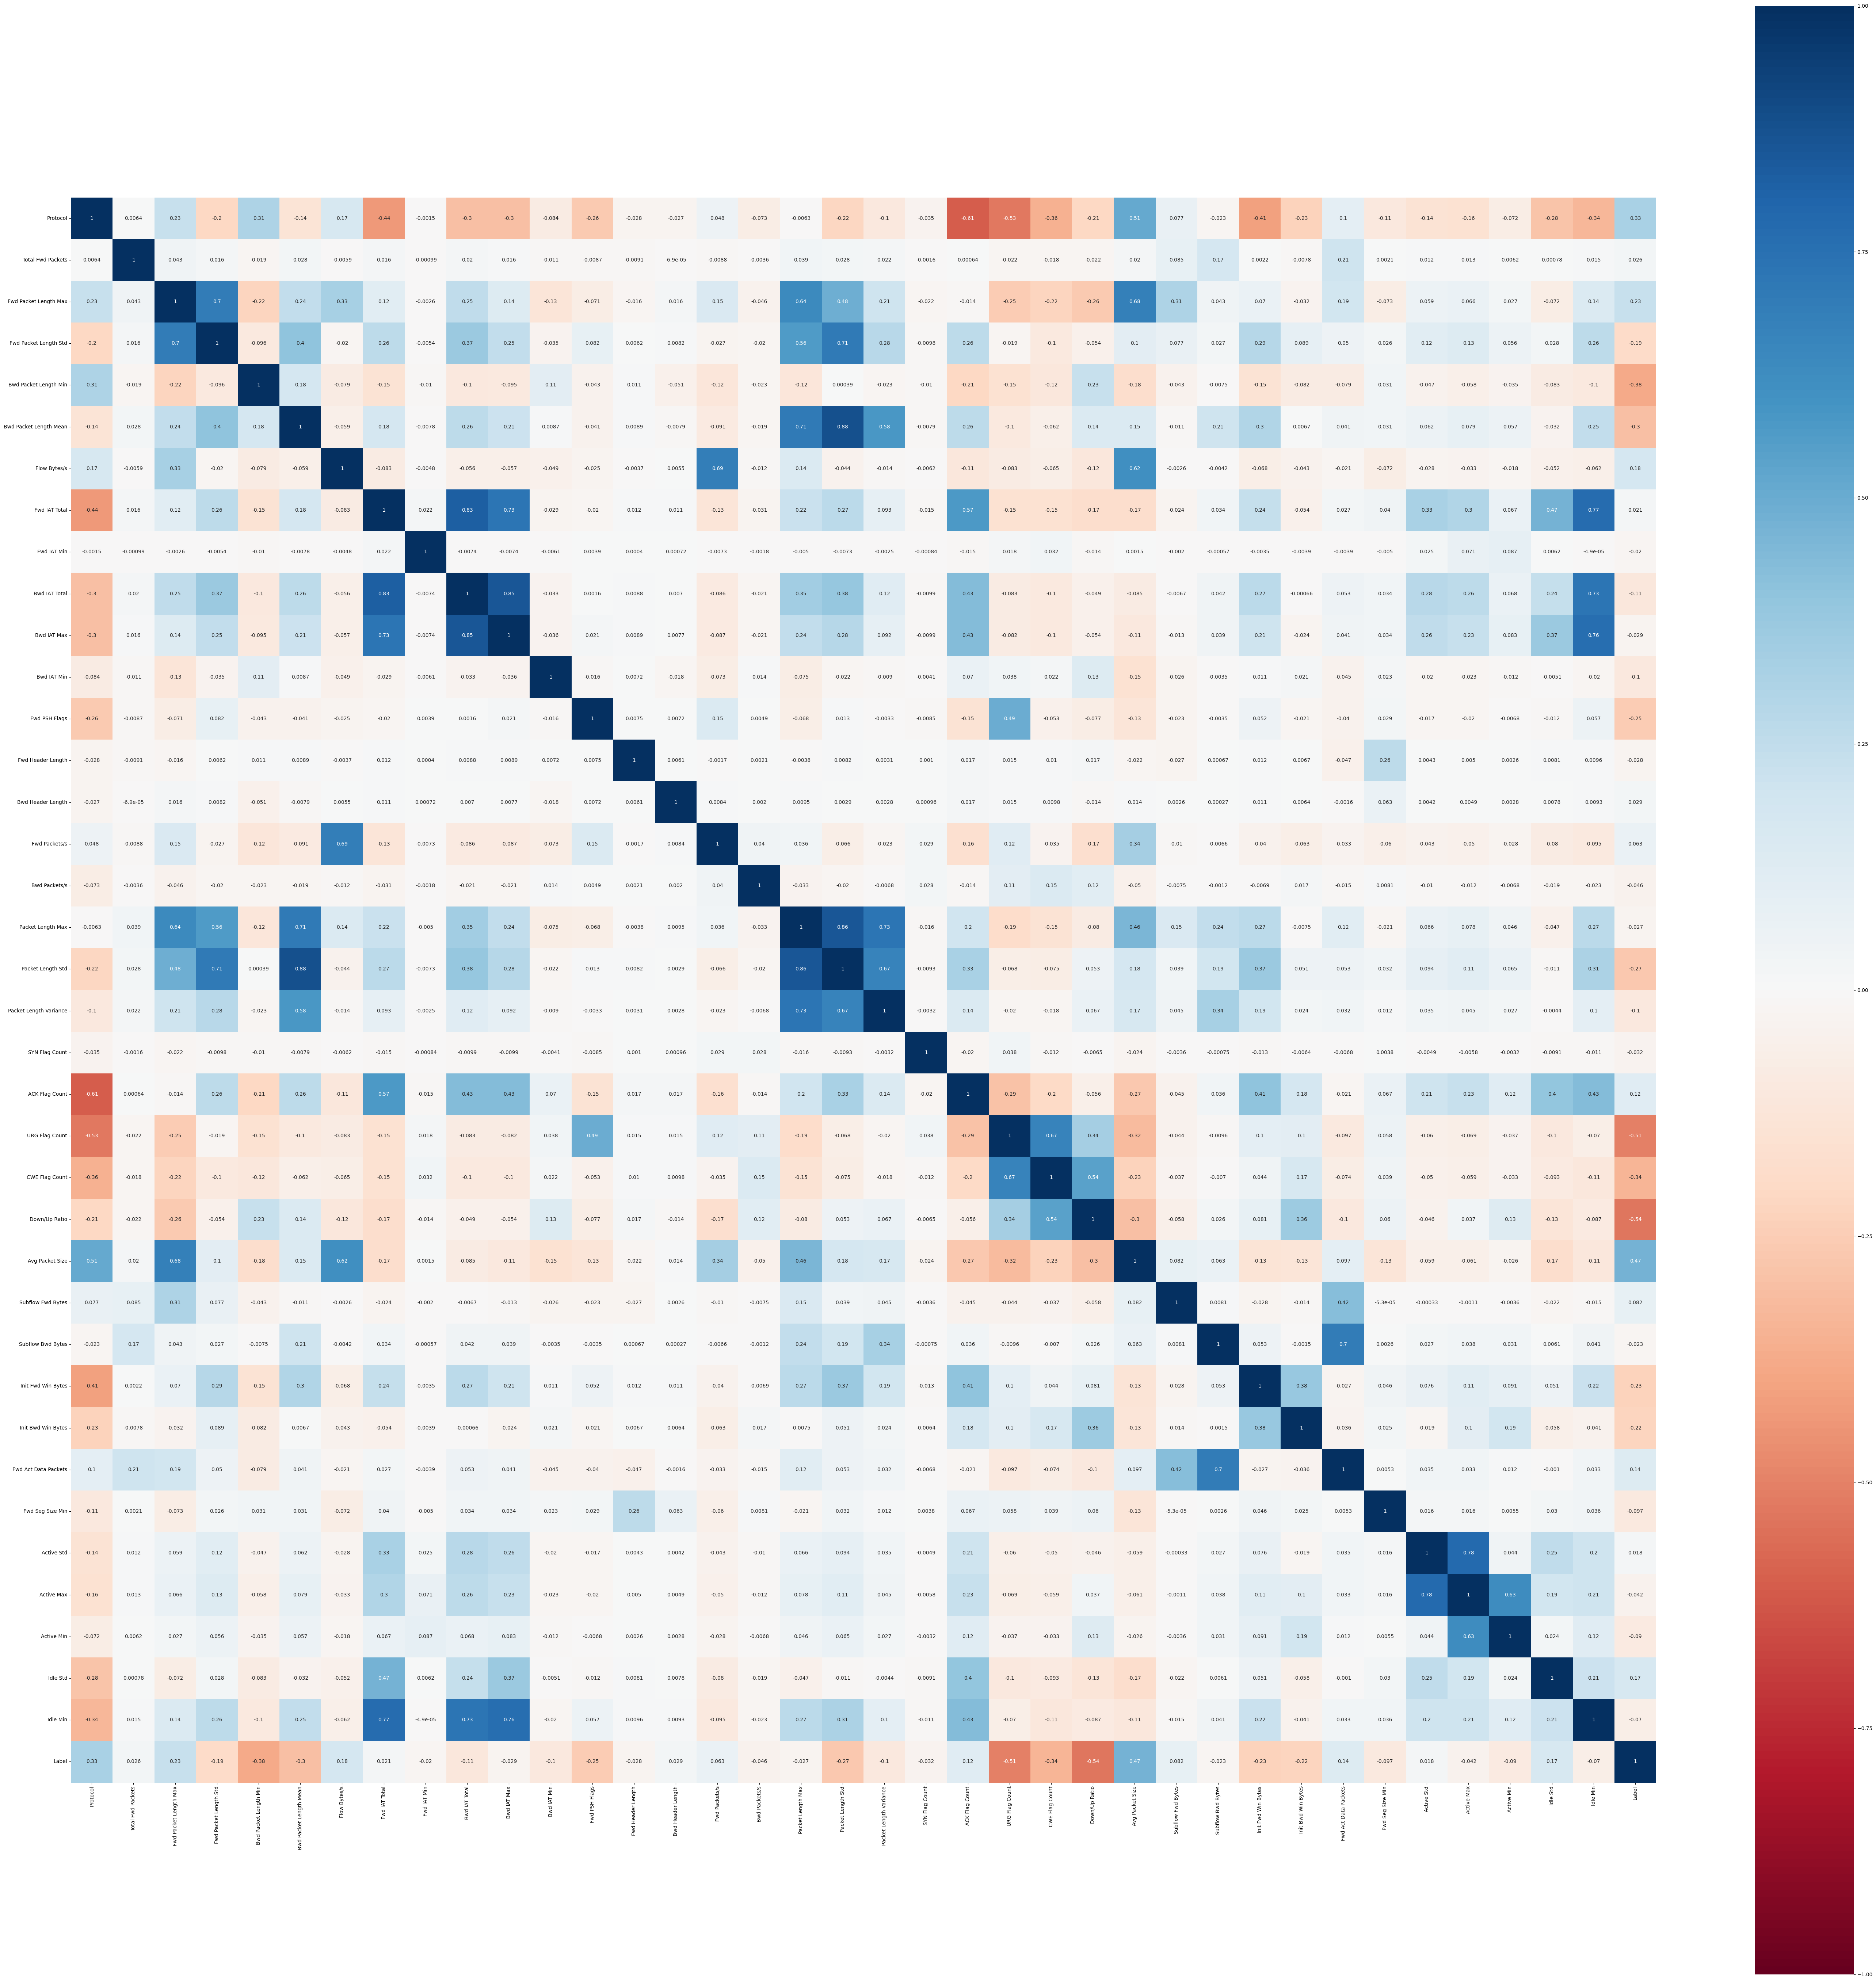

CPU times: user 4.86 s, sys: 262 ms, total: 5.12 s
Wall time: 5.13 s


In [21]:
%%time
# pearson correlation heatmap
plt.figure(figsize=(70, 70))
corr = df_balanced.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='RdBu', vmin=-1, vmax=1, square=True) # annot=True
plt.show()

In [22]:
%%time
correlated_col = set()
is_correlated = [True] * len(corr.columns)
threshold = 0.90
for i in range (len(corr.columns)):
    if(is_correlated[i]):
        for j in range(i):
          if (corr.iloc[i, j] >= threshold) and (is_correlated[j]):
            colname = corr.columns[j]
            is_correlated[j]=False
            correlated_col.add(colname)

print(correlated_col)
print(len(correlated_col))

set()
0
CPU times: user 15 ms, sys: 0 ns, total: 15 ms
Wall time: 14.9 ms


In [23]:
%%time
df_balanced.drop(correlated_col, axis=1, inplace=True)
print (df_balanced.shape)

(195662, 38)
CPU times: user 11.7 ms, sys: 12.2 ms, total: 24 ms
Wall time: 23.6 ms


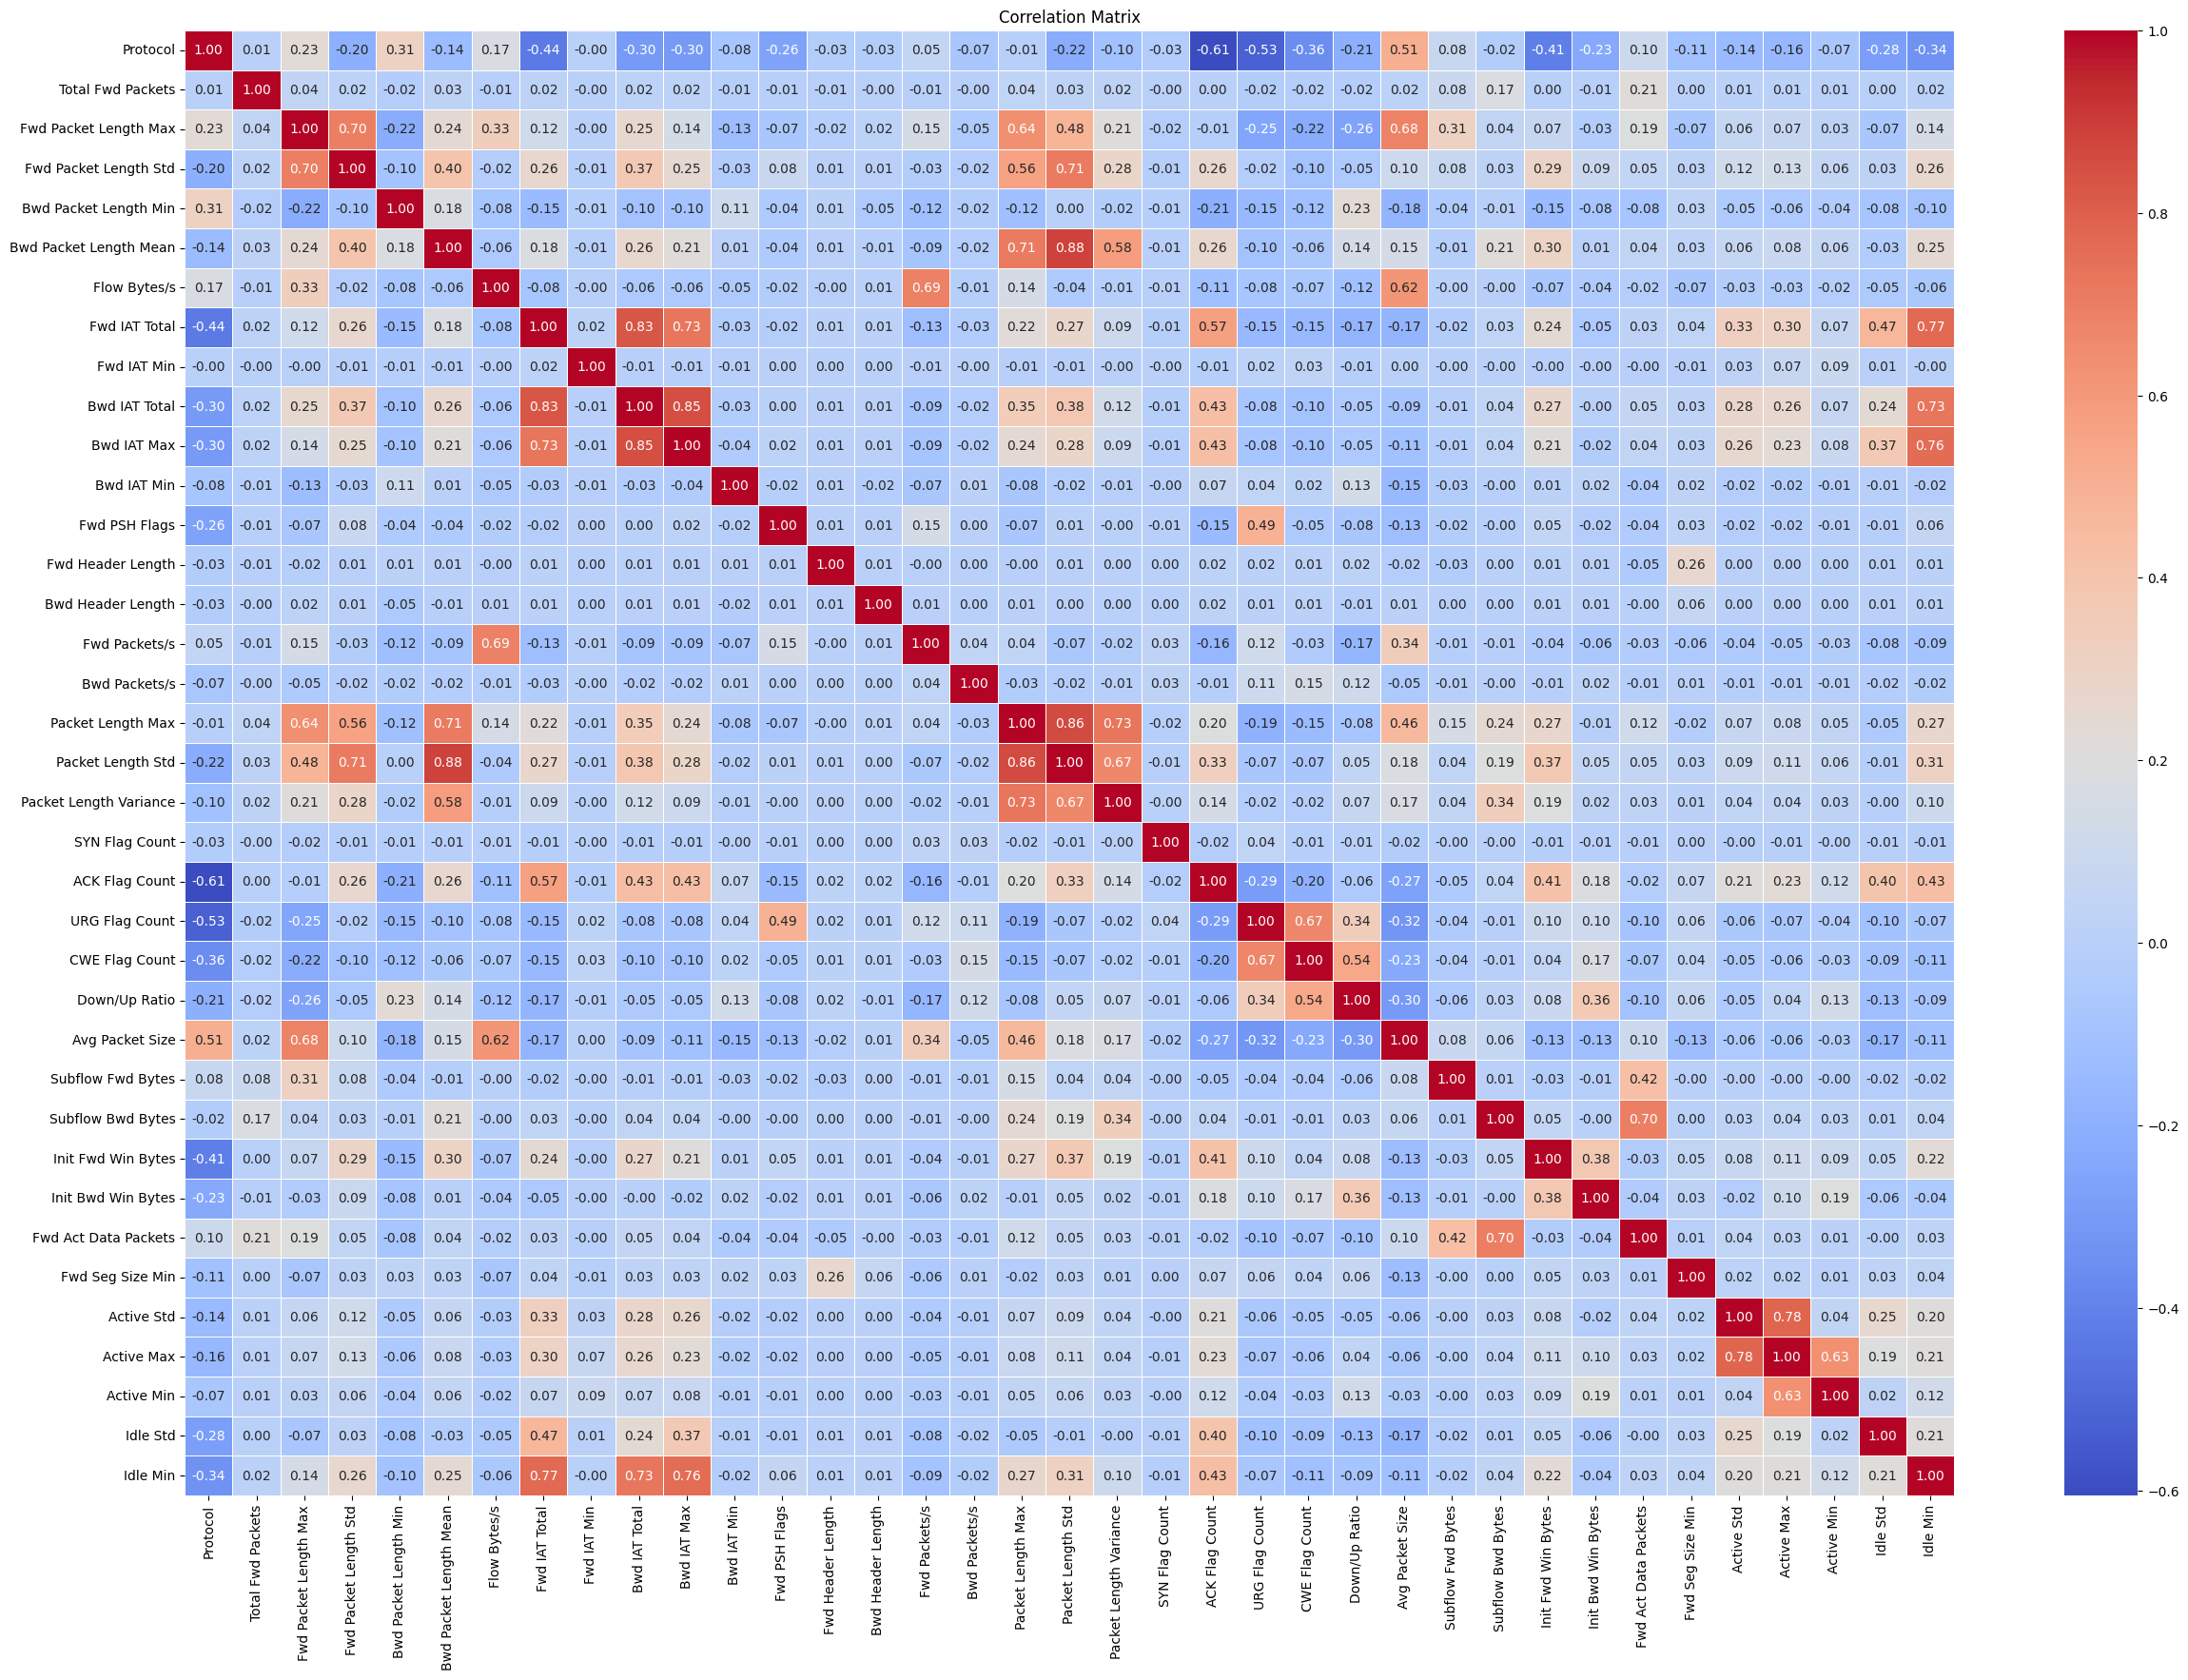

In [25]:
# Calculate correlation matrix
correlation_matrix = df_balanced.drop('Label', axis=1).corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

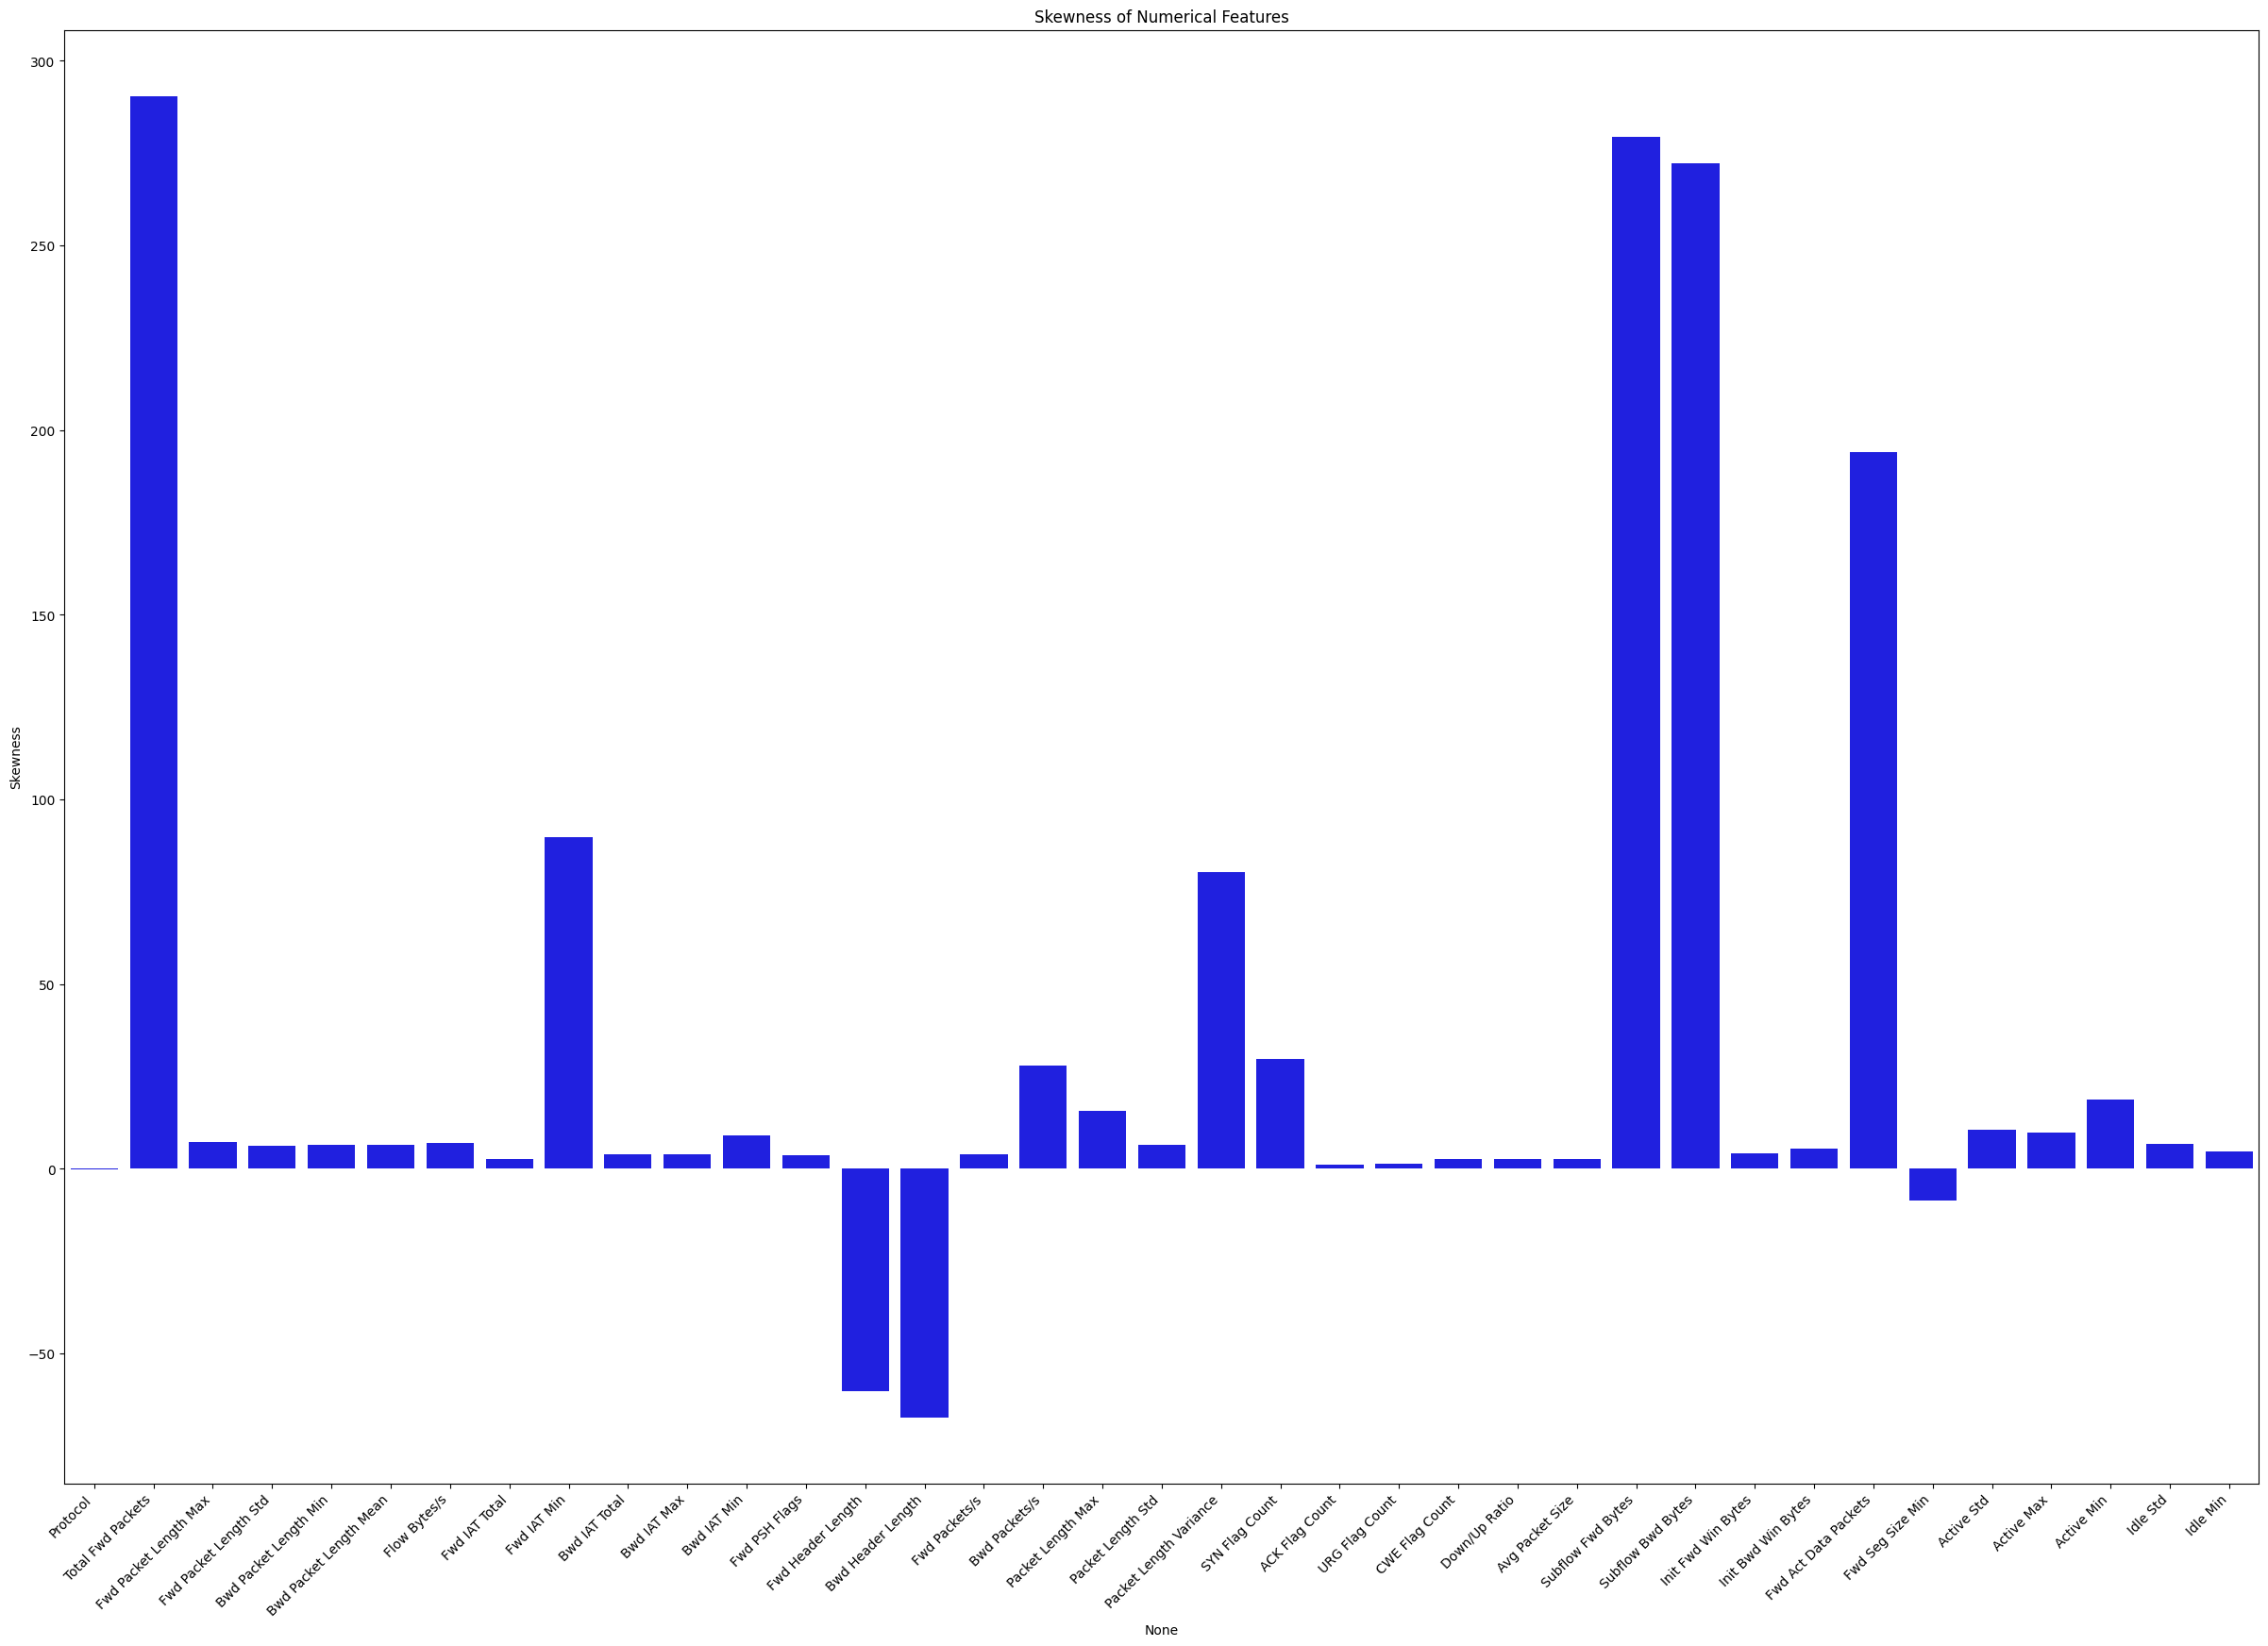

In [26]:
# Calculate skewness for each numerical column
skewness = df_balanced.drop('Label', axis=1).skew()

# Create a bar plot or a histogram of skewness values
plt.figure(figsize=(30, 20))
sns.barplot(x=skewness.index, y=skewness.values, color='blue')
plt.xticks(rotation=45, ha='right')
plt.title('Skewness of Numerical Features')
plt.ylabel('Skewness')
plt.show()

In [27]:
%%time
X=df_balanced.drop(["Label"], axis=1)
y=df_balanced["Label"]

# split the data for evaluation
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state =42, shuffle=True)

CPU times: user 75.9 ms, sys: 13.1 ms, total: 89 ms
Wall time: 88.8 ms


In [28]:
x_train

,Protocol,Total Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Std,Bwd Packet Length Min,Bwd Packet Length Mean,Flow Bytes/s,Fwd IAT Total,Fwd IAT Min,Bwd IAT Total,...,Subflow Bwd Bytes,Init Fwd Win Bytes,Init Bwd Win Bytes,Fwd Act Data Packets,Fwd Seg Size Min,Active Std,Active Max,Active Min,Idle Std,Idle Min
35900,17,2,25.0,0.00000,41,41.000000,2.931639e+03,3.0,3.0,3.0,...,82,-1,-1,1,20,0.000000,0.0,0.0,0.000000,0
55734,17,2,578.0,0.00000,0,0.000000,1.156000e+09,1.0,1.0,0.0,...,0,-1,-1,1,880,0.000000,0.0,0.0,0.000000,0
24968,17,2,32.0,0.00000,96,96.000000,1.188542e+04,3.0,3.0,2.0,...,192,-1,-1,1,20,0.000000,0.0,0.0,0.000000,0
166755,17,4,516.0,0.00000,0,0.000000,6.860017e+02,3008739.0,1.0,0.0,...,0,-1,-1,3,-1062718975,0.000000,0.0,0.0,0.000000,0
128018,6,13,1.0,0.27735,0,0.000000,2.182817e-01,54974820.0,2.0,50933920.0,...,0,16233,245,11,20,55.332630,179534.0,179405.0,54.614101,10007286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,6,13,1.0,0.27735,0,0.000000,2.151106e-01,55785244.0,2.0,50143960.0,...,0,253,245,11,20,20.596117,14845.0,14795.0,6989.275391,10001455
103694,6,41,3169.0,593.96759,0,805.736816,3.324476e+02,116956768.0,1.0,116863384.0,...,30618,64240,278,17,20,168070.796875,331153.0,93465.0,243799.109375,58046944
131932,0,6,0.0,0.00000,0,0.000000,0.000000e+00,9320258.0,1.0,0.0,...,0,-1,-1,0,0,0.000000,4.0,4.0,0.000000,9320251
146867,17,4,440.0,0.00000,0,0.000000,1.777778e+07,99.0,1.0,0.0,...,0,-1,-1,3,20,0.000000,0.0,0.0,0.000000,0


In [29]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training set
x_train = scaler.fit_transform(x_train)

# Transform the testing set using the same scaler
x_test = scaler.transform(x_test)

In [30]:
# Random Forest with GridSearchCV
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
rf_model = RandomForestClassifier()
rf_grid = GridSearchCV(rf_model, rf_params, cv=3, scoring='accuracy')
rf_grid.fit(x_train, y_train)
rf_best_model = rf_grid.best_estimator_

In [31]:
print("\nBest Estimator's Hyperparameters:")
print(rf_best_model.get_params())


Best Estimator's Hyperparameters:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [32]:
# XGBoost with GridSearchCV
xgb_params = {'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}
xgb_model = XGBClassifier()
xgb_grid = GridSearchCV(xgb_model, xgb_params, cv=3, scoring='accuracy')
xgb_grid.fit(x_train, y_train)
xgb_best_model = xgb_grid.best_estimator_

In [33]:
print("\nBest Estimator's Hyperparameters:")
print(xgb_best_model.get_params())


Best Estimator's Hyperparameters:
{'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.2, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 7, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


# **Calculate the Metrics for Random Forest**

In [34]:
# Make predictions on the test set using the best Random Forest model
y_pred_rf = rf_best_model.predict(x_test)
y_proba_rf = rf_best_model.predict_proba(x_test)[:, 1] # Get probabilities for the positive class (class 1)

In [35]:
# Calculate and print the confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix for Random Forest:")
print(conf_matrix_rf)

Confusion Matrix for Random Forest:
[[19519     4]
 [   30 19580]]



Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19523
           1       1.00      1.00      1.00     19610

    accuracy                           1.00     39133
   macro avg       1.00      1.00      1.00     39133
weighted avg       1.00      1.00      1.00     39133



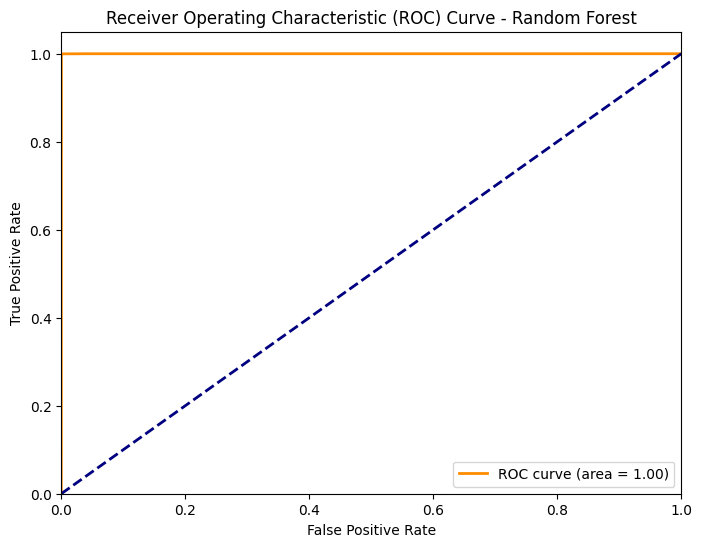

In [36]:
# Calculate and print the classification report
class_report_rf = classification_report(y_test, y_pred_rf)
print("\nClassification Report for Random Forest:")
print(class_report_rf)

# Calculate the ROC curve and AUC
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()

# **Calculate the Metrics for XGBoost**

In [37]:
# Make predictions on the test set using the best Random Forest model
y_pred_xgb = xgb_best_model.predict(x_test)
y_proba_xgb = xgb_best_model.predict_proba(x_test)[:, 1] # Get probabilities for the positive class (class 1)

In [38]:
# Calculate and print the confusion matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
print("Confusion Matrix for XGBoost:")
print(conf_matrix_xgb)

Confusion Matrix for XGBoost:
[[19520     3]
 [   26 19584]]



Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19523
           1       1.00      1.00      1.00     19610

    accuracy                           1.00     39133
   macro avg       1.00      1.00      1.00     39133
weighted avg       1.00      1.00      1.00     39133



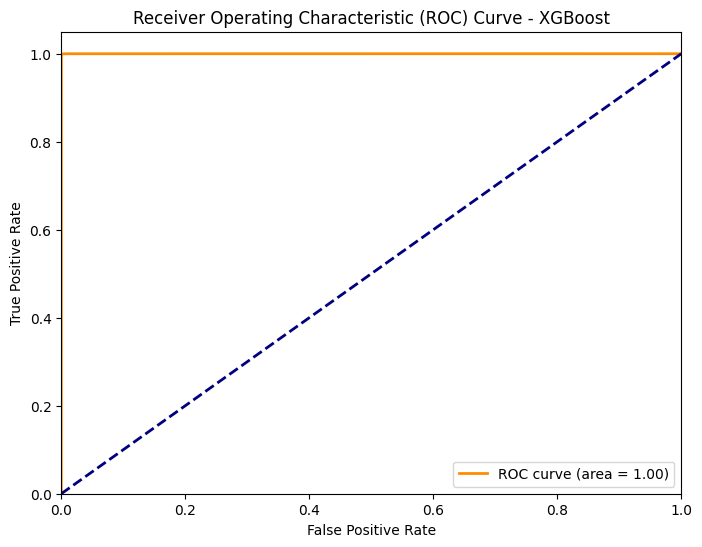

In [39]:
# Calculate and print the classification report
class_report_xgb = classification_report(y_test, y_pred_xgb)
print("\nClassification Report for XGBoost:")
print(class_report_xgb)

# Calculate the ROC curve and AUC
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_proba_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - XGBoost')
plt.legend(loc="lower right")
plt.show()